## Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Đọc dữ liệu từ file

In [2]:
weather_df = None
weather_df = pd.read_csv('../data/internal/processed/weather_processed.csv')

In [3]:
weather_df.head()

,Country,Name,Weather,Temp,Humidity,Visibility,Wind speed,Clouds
0,Japan,Tokyo,Clear,280.77,57,10000,3.60,0
1,Indonesia,Pecenongan,Haze,298.99,83,6000,2.06,20
2,India,New Delhi,Mist,293.25,83,1500,0.00,0
3,China,Guangzhou,Clouds,288.07,47,10000,5.16,27
4,India,Konkan Division,Mist,300.18,83,2200,3.09,20


## Câu hỏi #1

- Độ ẩm ảnh hưởng đến thời tiết như thế nào?
- Ý Nghĩa: Hiểu mối quan hệ giữa độ ẩm và điều kiện thời tiết có thể giúp dự đoán và ứng phó với các điều kiện thời tiết cụ thể.
- Trả Lời: Sử dụng biểu đồ boxplot để mô tả phân phối của độ ẩm dựa trên các điều kiện thời tiết khác nhau, giúp nhận biết sự biến động và mối quan hệ

/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


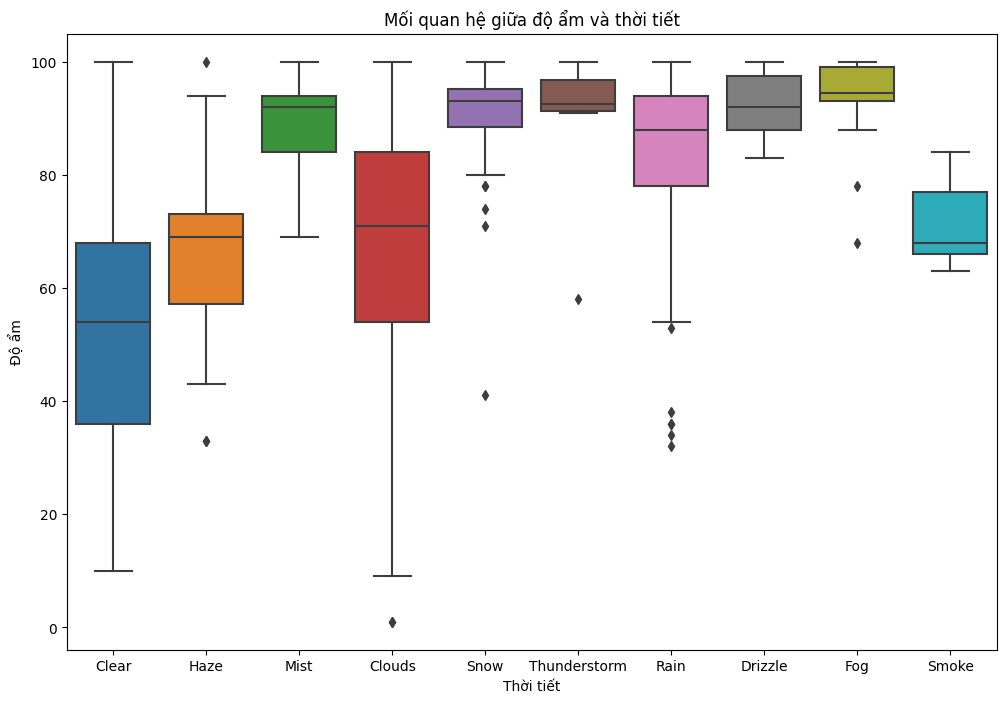

In [4]:
# visualize
plt.figure(figsize=(12, 8))
sns.boxplot(x='Weather', y='Humidity', data=weather_df)
plt.title('Mối quan hệ giữa độ ẩm và thời tiết')
plt.xlabel('Thời tiết')
plt.ylabel('Độ ẩm')
plt.show()

Kết luận:
- Các thời tiết Mist, Snow, Thunderstorm, Rain, Drizzle, Fog có độ ẩm rất cao
- Clear có độ ẩm tương đối thấp
- Độ ẩm của Clear và Clouds biến động nhiều nhất
- Độ ẩm của Thunderstorm, Snow và Fog ít biến động

## Câu hỏi #2

- Tuần suất xuất hiện của các loại thời tiết ở mỗi quốc gia là như thế nào?
- Ý Nghĩa: Hiểu về đặc điểm thời tiết của từng quốc gia giúp chúng ta hiểu biết về sự biến động của khí hậu, cung cấp thông tin quan trọng cho việc dự báo thời tiết và thực hiện các biện pháp phản ứng phù hợp.
- Trả Lời:
    - Tạo DataFrame `data` có 3 cột: Country, Weather và Frequency (chứa tần suất xuất hiện của một loại thời tiết ở một quốc gia nào đó)
    - Mỗi loại thời tiết vẽ 1 biểu đồ tròn tương ứng. Trong đó, nội dung của biểu đồ là tỉ lệ các quốc gia xuất hiện loại thời tiết đó


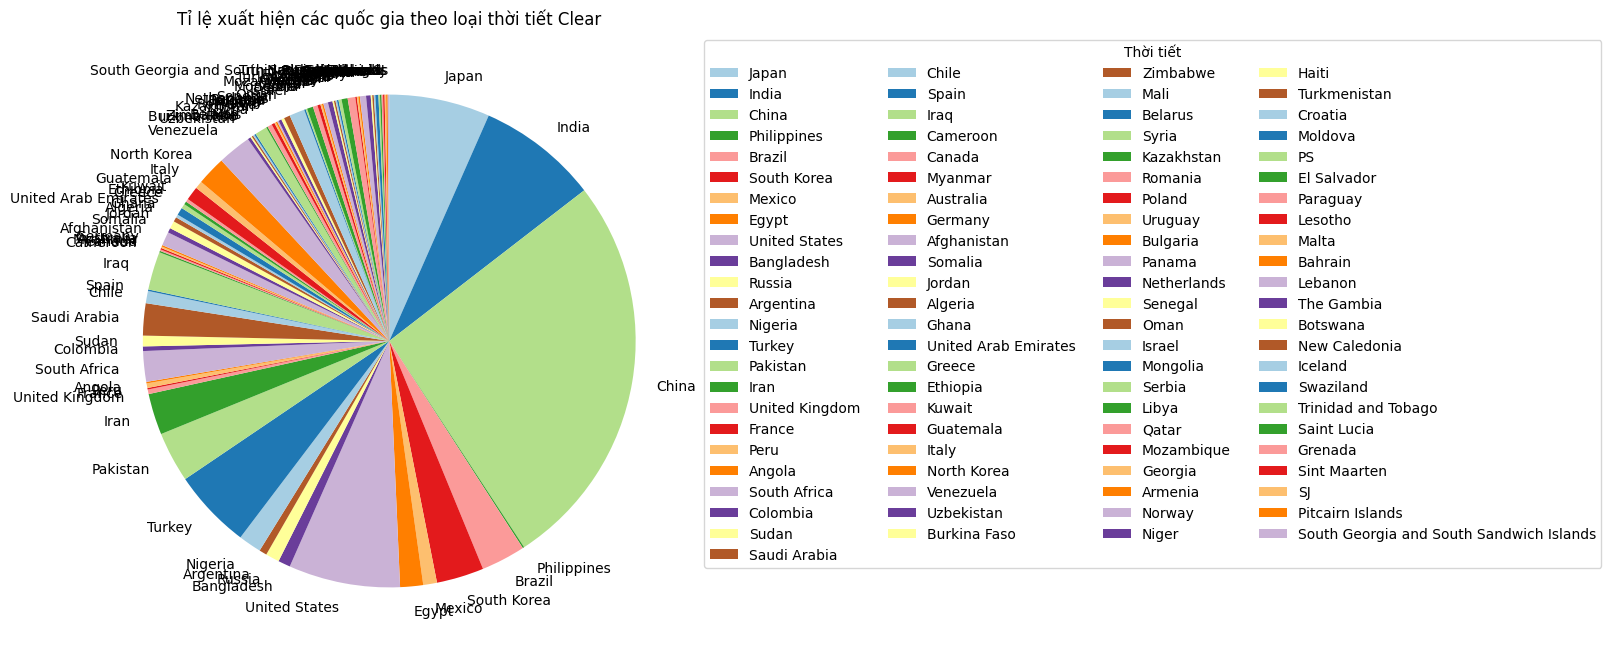

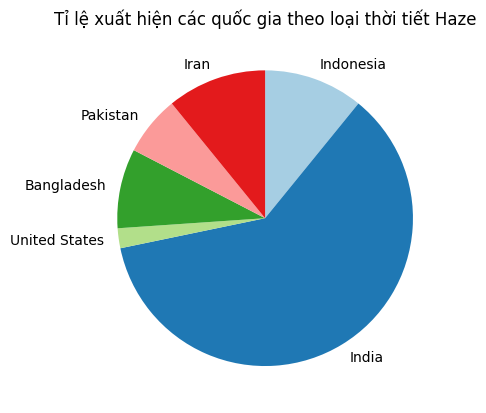

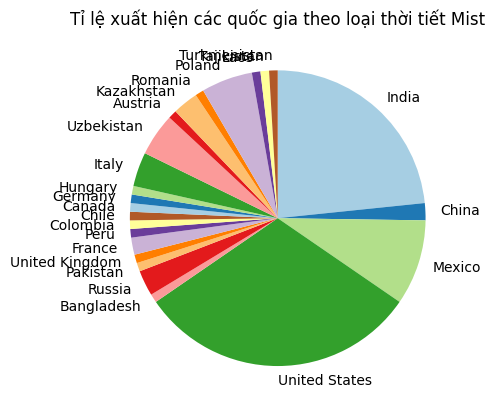

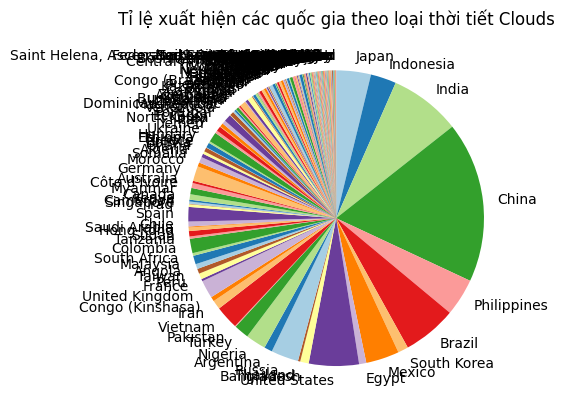

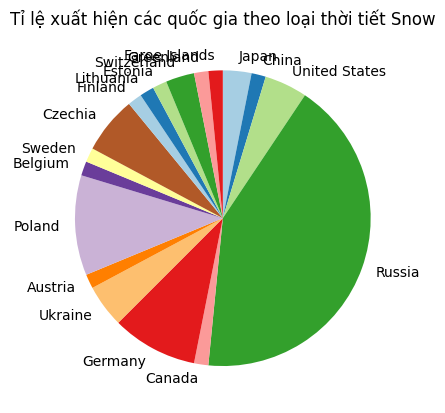

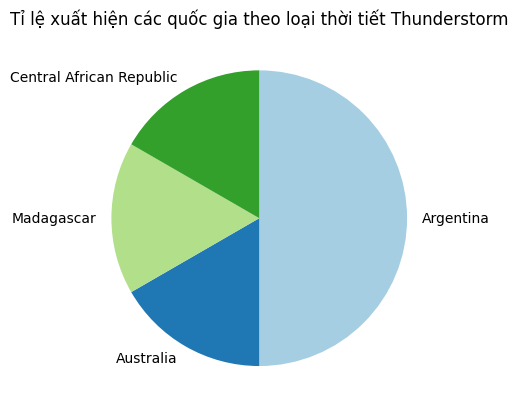

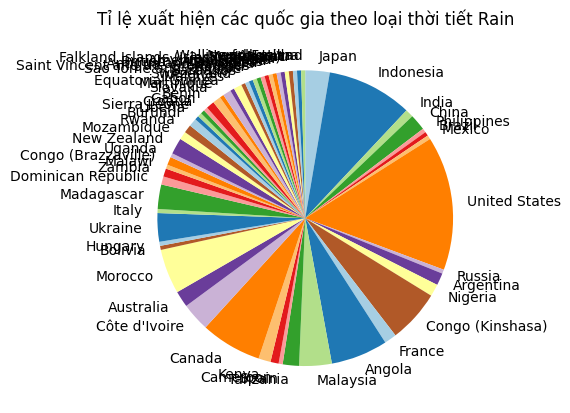

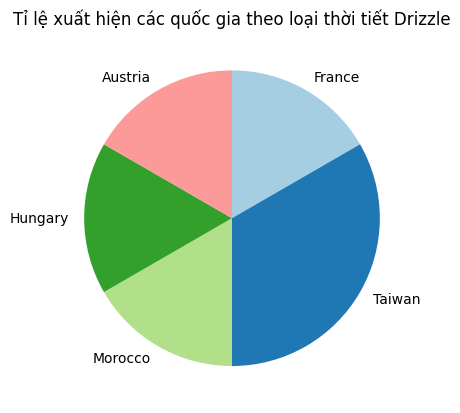

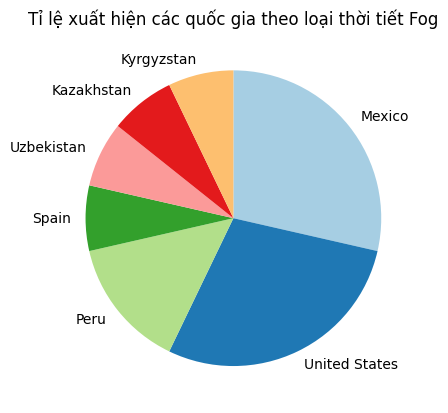

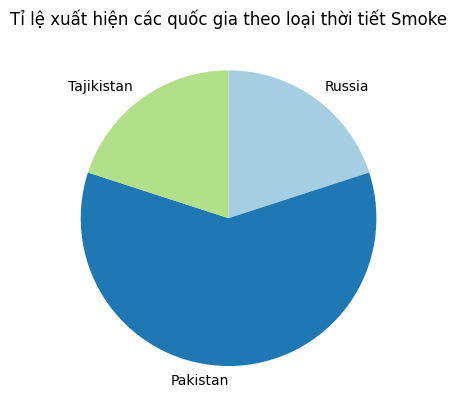

In [5]:
# Lấy ra các giá trị unique của cột 'Country' và 'Weather'
unique_countries = weather_df['Country'].unique()
unique_weathers = weather_df['Weather'].unique()

# Tạo DataFrame mới với các giá trị unique
data = {'Country': [], 'Weather': [], 'Frequency': []}

# Lặp qua từng quốc gia và thời tiết để lấy số lần xuất hiện
for country in unique_countries:
    for weather in unique_weathers:
        count = len(weather_df[(weather_df['Country'] == country) & (weather_df['Weather'] == weather)])
        data['Country'].append(country)
        data['Weather'].append(weather)
        data['Frequency'].append(count)

# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data)
df = df[df['Frequency'] != 0]

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(15, 8))
# Lặp qua từng loại thời tiết để vẽ biểu đồ tròn
for weather in unique_weathers:
    # Lọc dữ liệu cho loại thời tiết hiện tại
    subset_df = df[df['Weather'] == weather]
    
    colors = sns.color_palette("Paired", len(subset_df))

    # Tạo biểu đồ tròn
    plt.pie(subset_df['Frequency'], labels=subset_df['Country'], autopct=None, startangle=90, counterclock=False, colors=colors)

    # Đặt tiêu đề cho biểu đồ tròn
    plt.title(f'Tỉ lệ xuất hiện các quốc gia theo loại thời tiết {weather}')
    
    if weather == 'Clear':
        plt.legend(title='Thời tiết', bbox_to_anchor=(1, 1), ncol=4)
    
    # Hiển thị biểu đồ tròn
    plt.show()

Kết luận:
- Các quốc gia thường xuyên xuất hiện mỗi loại thời tiết:
    - Clear: Japan, India, China, United States
    - Haze: India, Indonesia, Iran, Bangladesh, United States, Pakistan
    - Mist: India, United States, Mexico
    - Clouds: China, India, Brazil, United States
    - Snow: Russia, Germany, Poland, Czechia
    - Thunderstorm: Argentina, Central African Republic, Madagascar, Australia
    - Rain: United States, Indonesia, Congo, Angola, Canada, Morocco
    - Drizzle: Hungary, Austria, France, Taiwan, Morocco
    - Fog: Mexico, Kyrgyzstan, Kazakhstan, Uzbekistan, Spain, Peru, United States
    - Smoke: Tajikistan, Russia, Pakistan

## Câu hỏi #3

- Các giá trị của Temp, Humidity, Wind speed và Clouds phân bố như thế nào khi thời tiết là **Clear**?
- Ý Nghĩa:
    - Dự Báo Thời Tiết: Hiểu biến động về nhiệt độ, độ ẩm, tốc độ gió, và đám mây trong điều kiện Clear giúp cải thiện khả năng dự báo thời tiết.
    - Sự Chuẩn Bị Với Khí Hậu: Có thông tin về sự thay đổi trong các yếu tố thời tiết quan trọng trong thời tiết rõ ràng có thể hỗ trợ trong việc chuẩn bị cho các hoạt động ngoại ô hoặc sự kiện.
- Trả Lời: Sử dụng biểu đồ violin để hình dung phân phối của Nhiệt độ, Độ ẩm, Tốc độ gió, và Đám mây khi thời tiết là Clear. Mỗi biểu đồ sẽ thể hiện sự biến động của mỗi thuộc tính, giúp nhận biết các đặc điểm quan trọng và sự khác biệt trong điều kiện thời tiết rõ ràng.

/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


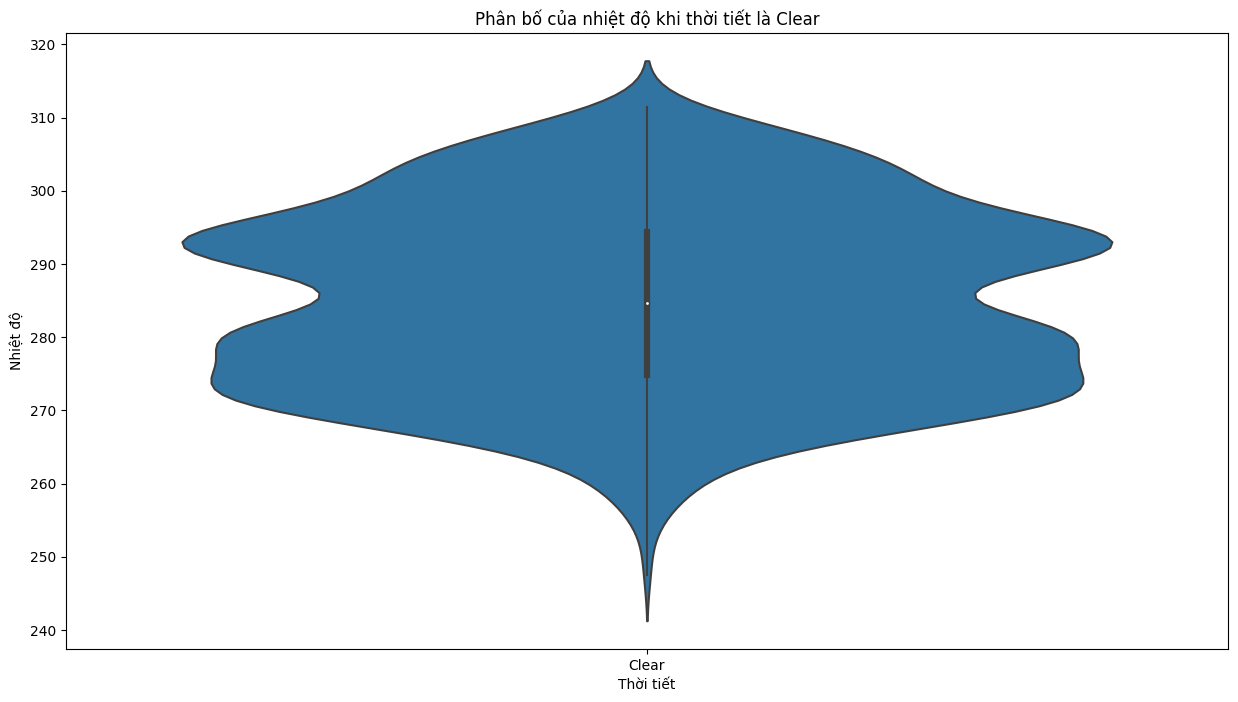

/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


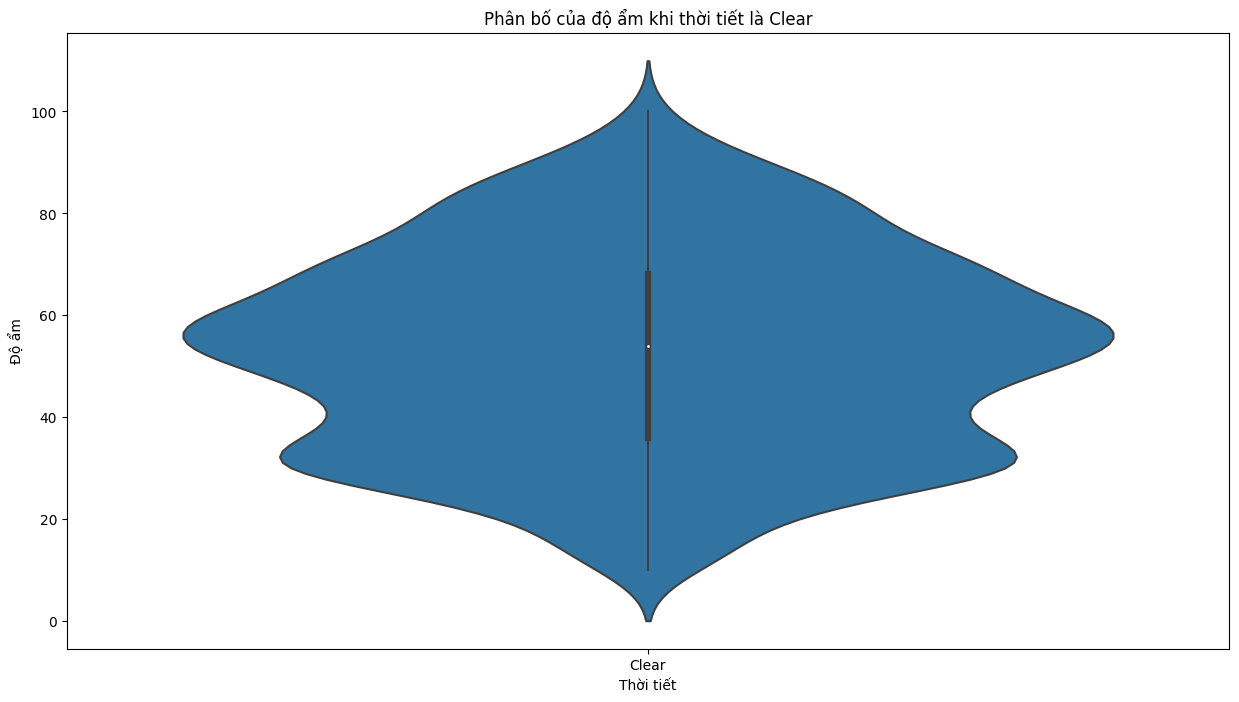

/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


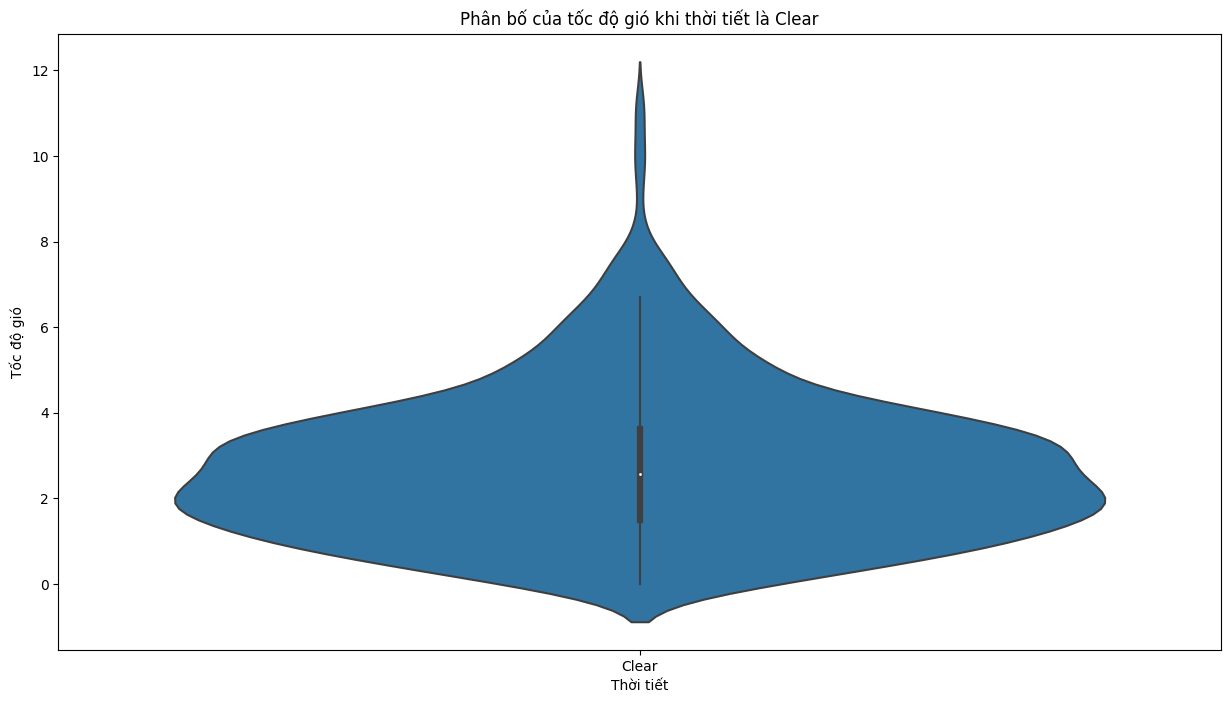

/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


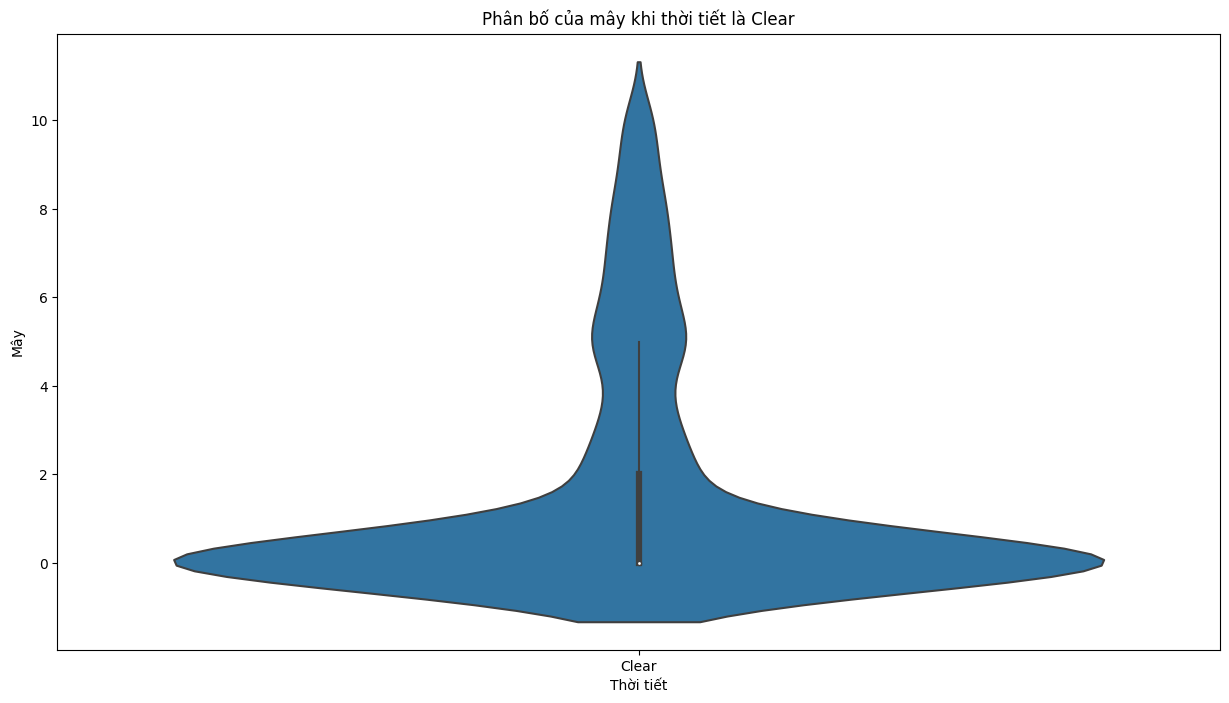

In [6]:
# Lọc dữ liệu khi Weather là Clear
clear_weather_data = weather_df[weather_df['Weather'] == 'Clear']

# Vẽ violin plot cho các thuộc tính khi Weather là Clear
plt.figure(figsize=(15, 8))
sns.violinplot(x='Weather', y='Temp', data=clear_weather_data)
plt.title('Phân bố của nhiệt độ khi thời tiết là Clear')
plt.xlabel('Thời tiết')
plt.ylabel('Nhiệt độ')
plt.show()

plt.figure(figsize=(15, 8))
sns.violinplot(x='Weather', y='Humidity', data=clear_weather_data)
plt.title('Phân bố của độ ẩm khi thời tiết là Clear')
plt.xlabel('Thời tiết')
plt.ylabel('Độ ẩm')
plt.show()

plt.figure(figsize=(15, 8))
sns.violinplot(x='Weather', y='Wind speed', data=clear_weather_data)
plt.title('Phân bố của tốc độ gió khi thời tiết là Clear')
plt.xlabel('Thời tiết')
plt.ylabel('Tốc độ gió')
plt.show()

plt.figure(figsize=(15, 8))
sns.violinplot(x='Weather', y='Clouds', data=clear_weather_data)
plt.title('Phân bố của mây khi thời tiết là Clear')
plt.xlabel('Thời tiết')
plt.ylabel('Mây')
plt.show()

Kết luận: Khi thời tiết là Clear:
- Nhiệt độ trung bình rơi vào khoảng 270 - 300
- Độ ẩm trung bình rơi vào khoảng 20 - 70
- Tốc độ gió trung bình rơi vào khoảng 1 - 4
- Mây trung bình rơi vào khoảng 0 - 1

## Câu hỏi #4

- Giá trị của Temp, Humidity, Wind speed và Clouds phân bố như thế nào khi thời tiết là Clouds?
- Ý Nghĩa:
    - Dự Báo Thời Tiết: Hiểu biến động của nhiệt độ, độ ẩm, tốc độ gió, và mây trong điều kiện đầy mây giúp cải thiện khả năng dự báo thời tiết.
    - Chuẩn Bị Cho Khí Hậu: Có cái nhìn sâu sắc về sự thay đổi của các yếu tố thời tiết quan trọng trong khi thời tiết đầy mây có thể hỗ trợ trong việc chuẩn bị cho các hoạt động ngoài trời hoặc sự kiện.
- Trả Lời: Bằng cách sử dụng biểu đồ violin, chúng ta có thể quan sát phân phối của Nhiệt độ, Độ ẩm, Tốc độ gió, và Mây khi thời tiết đầy mây. Mỗi biểu đồ thể hiện sự biến động của mỗi thuộc tính, giúp nhận diện các đặc điểm quan trọng và sự khác biệt trong điều kiện thời tiết đầy mây.

/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


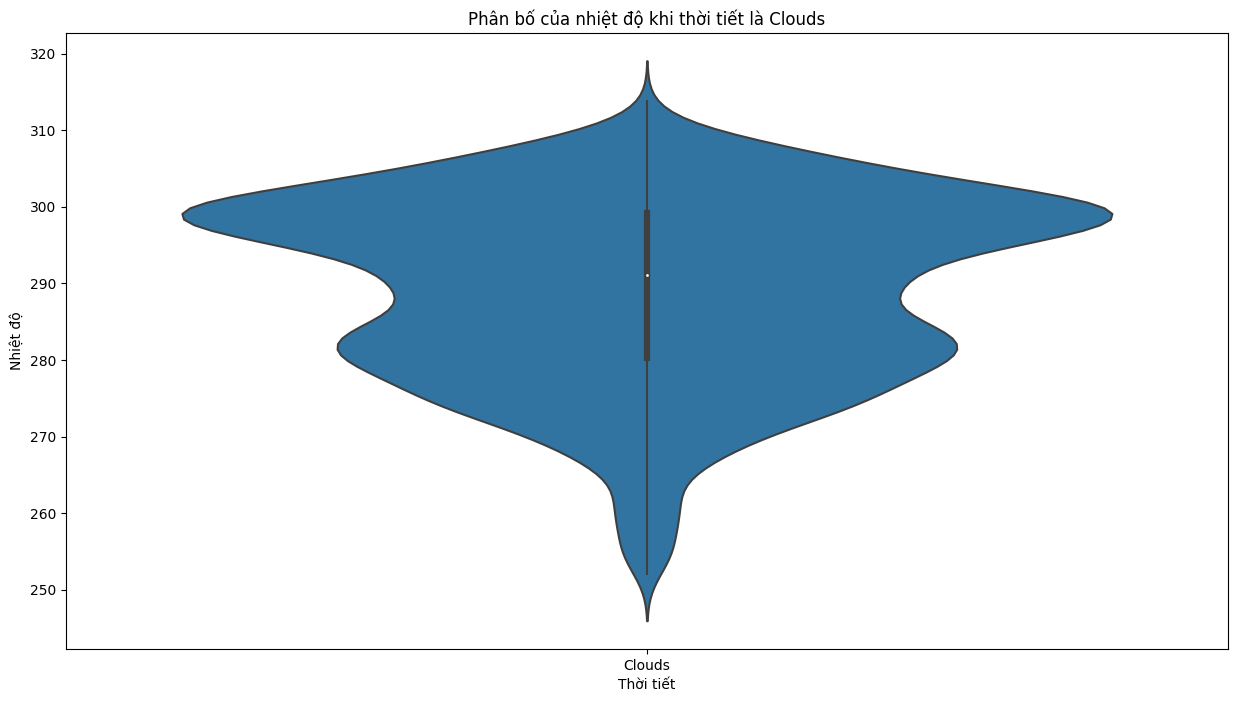

/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


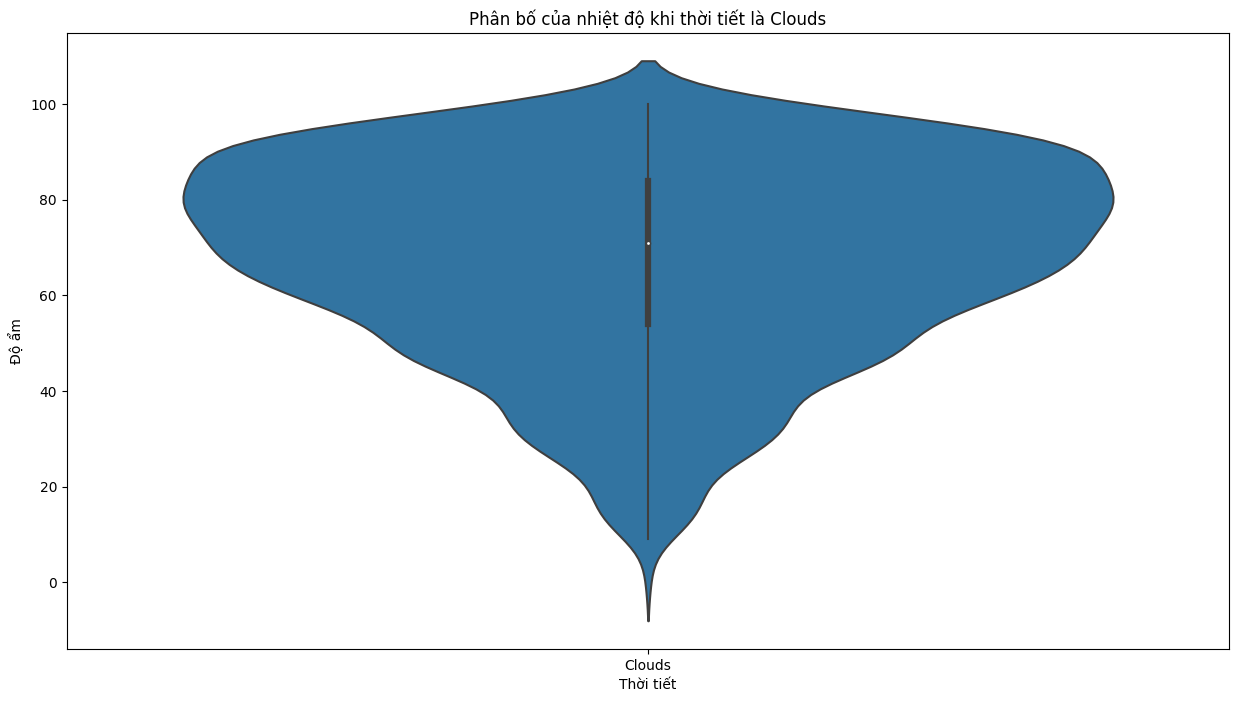

/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


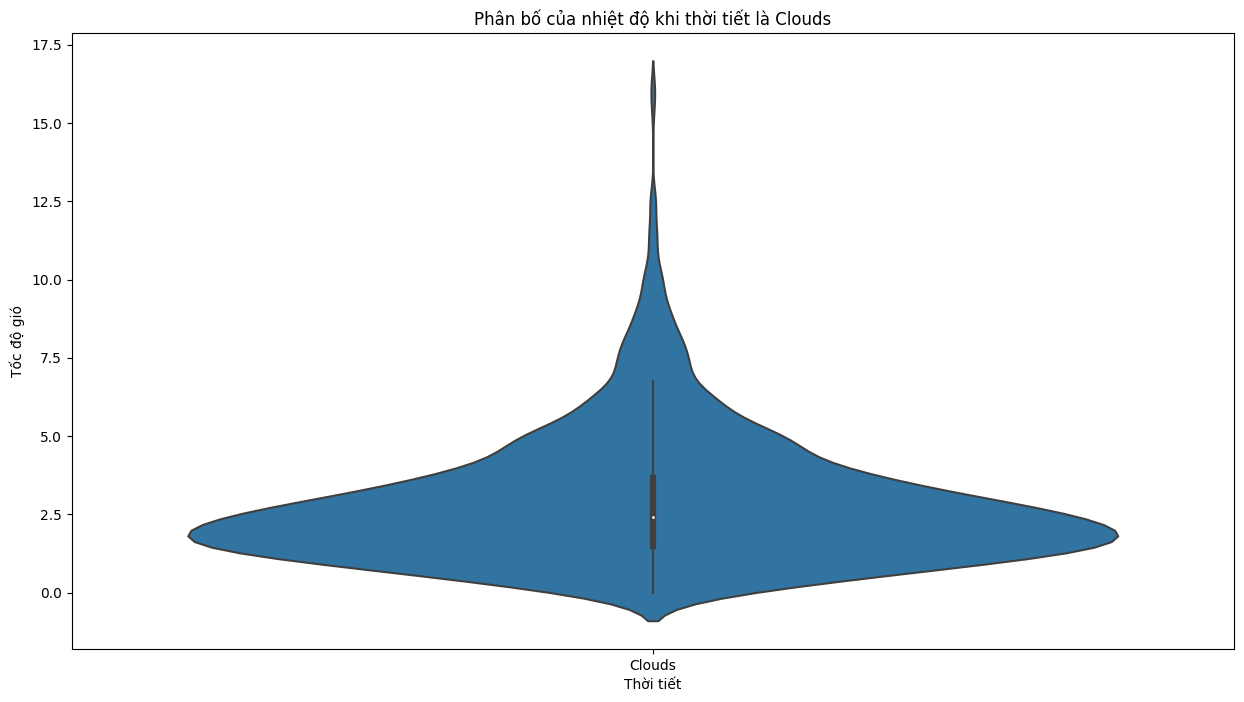

/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


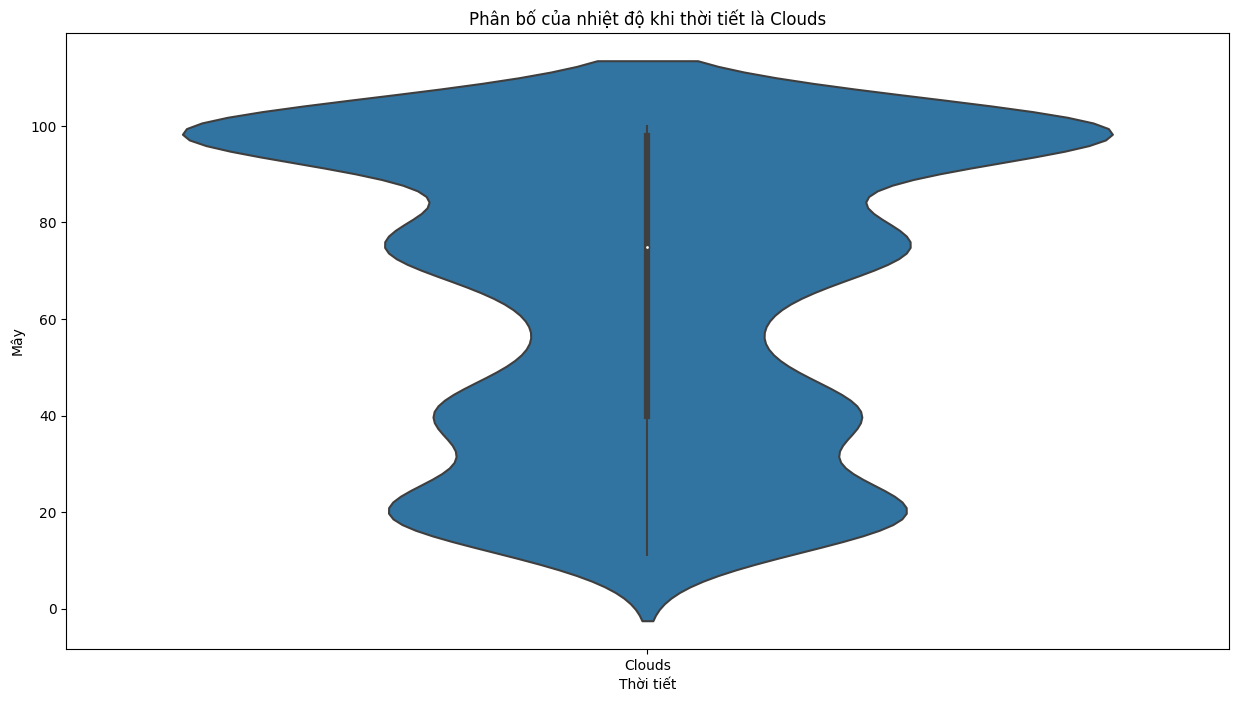

In [7]:
# Lọc dữ liệu khi Weather là Clouds
cloudy_weather_data = weather_df[weather_df['Weather'] == 'Clouds']

# Vẽ violin plot cho các thuộc tính khi Weather là Clouds
plt.figure(figsize=(15, 8))
sns.violinplot(x='Weather', y='Temp', data=cloudy_weather_data)
plt.title('Phân bố của nhiệt độ khi thời tiết là Clouds')
plt.xlabel('Thời tiết')
plt.ylabel('Nhiệt độ')
plt.show()

plt.figure(figsize=(15, 8))
sns.violinplot(x='Weather', y='Humidity', data=cloudy_weather_data)
plt.title('Phân bố của nhiệt độ khi thời tiết là Clouds')
plt.xlabel('Thời tiết')
plt.ylabel('Độ ẩm')
plt.show()

plt.figure(figsize=(15, 8))
sns.violinplot(x='Weather', y='Wind speed', data=cloudy_weather_data)
plt.title('Phân bố của nhiệt độ khi thời tiết là Clouds')
plt.xlabel('Thời tiết')
plt.ylabel('Tốc độ gió')
plt.show()

plt.figure(figsize=(15, 8))
sns.violinplot(x='Weather', y='Clouds', data=cloudy_weather_data)
plt.title('Phân bố của nhiệt độ khi thời tiết là Clouds')
plt.xlabel('Thời tiết')
plt.ylabel('Mây')
plt.show()


Kết luận: Khi thời tiết là Clouds:
- Nhiệt độ trung bình: 270 - 305
- Độ ẩm trung bình: 50 - 95
- Tốc độ gió trung bình: 0 - 3.5
- Mây trung bình: 70 - 100

## Câu hỏi #5

- Các nhân tố ảnh hưởng tới đặc điểm của thời tiết có tương quan như thế nào?
- Ý Nghĩa: Hiểu mức độ tương quan giữa các yếu tố như nhiệt độ, độ ẩm, tầm nhìn, tốc độ gió, mây là quan trọng để đánh giá ảnh hưởng và tương tác giữa chúng trong ngữ cảnh thời tiết. Mối quan hệ này có thể cung cấp thông tin quan trọng để hiểu động lực thời tiết và dự báo điều kiện thời tiết cụ thể.
- Trả Lời: Để đánh giá mức độ tương quan giữa các yếu tố, ta sử dụng biểu đồ ma trận tương quan để hiển thị các hệ số tương quan giữa từng cặp yếu tố. Hệ số tương quan càng gần 1 hoặc -1, mức độ tương quan càng mạnh. Dưới đây là biểu đồ ma trận tương quan:

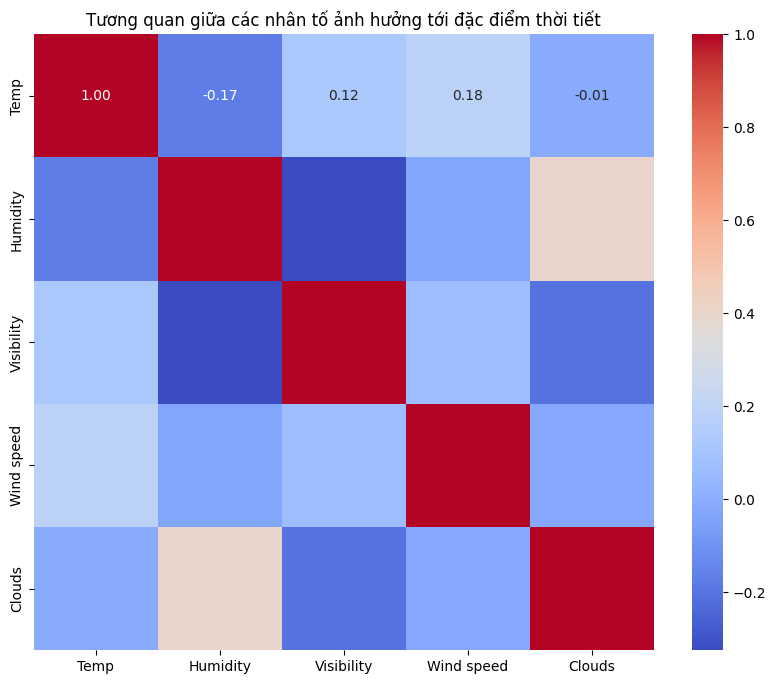

In [8]:
# Tạo DataFrame chứa các yếu tố cần đánh giá
factors_df = weather_df[['Temp', 'Humidity', 'Visibility', 'Wind speed', 'Clouds']]

# Tính toán ma trận tương quan
correlation_matrix = factors_df.corr()

# Vẽ biểu đồ ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Tương quan giữa các nhân tố ảnh hưởng tới đặc điểm thời tiết')
plt.show()

Kết luận: Hầu như các nhân tố có độ tương quan tầm trung hoặc thấp => Không có mối quan hệ tuyến tính mạnh giữa các nhân tố

## Câu hỏi #6

- Nhiệt độ giữa thời tiết Clear và Clouds khác nhau như thế nào?
- Ý Nghĩa: So sánh nhiệt độ giữa các điều kiện thời tiết Clear và Clouds giúp chúng ta hiểu sự khác biệt về nhiệt độ trong hai điều kiện thời tiết khác nhau. Thông qua so sánh này, chúng ta có thể đánh giá cách thời tiết Clouds và các ngày trong điều kiện Clear ảnh hưởng đến nhiệt độ môi trường.
- Trả Lời: Sử dụng biểu đồ histogram để so sánh phân phối nhiệt độ giữa các ngày Clouds và các ngày trong điều kiện Clear. Phân phối màu xanh đại diện cho các ngày Clouds, và phân phối màu cam đại diện cho các ngày Clear.

/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/baobui1509/miniconda3/envs/min_ds-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

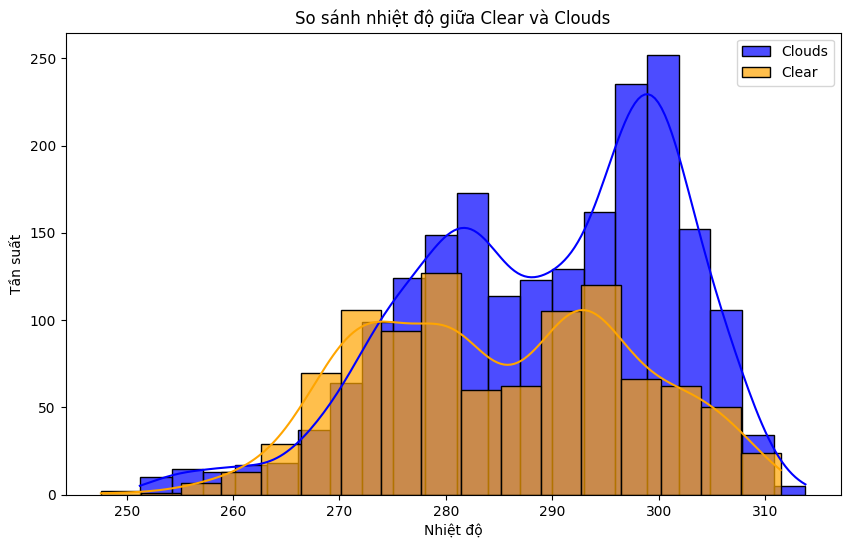

In [9]:
# Lọc dữ liệu cho thời tiết Rain và Clear
rain_data = weather_df[weather_df['Weather'] == 'Clouds']
clear_data = weather_df[weather_df['Weather'] == 'Clear']

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ so sánh nhiệt độ giữa Rain và Clear
sns.histplot(rain_data['Temp'], label='Clouds', kde=True, color='blue', alpha=0.7)
sns.histplot(clear_data['Temp'], label='Clear', kde=True, color='orange', alpha=0.7)

# Thiết lập các thông số cho biểu đồ
plt.title('So sánh nhiệt độ giữa Clear và Clouds')
plt.xlabel('Nhiệt độ')
plt.ylabel('Tần suất')
plt.legend()

# Hiển thị biểu đồ
plt.show()


Kết luận:
- Nhìn chung, nhiệt độ của Clouds cao hơn Clear
- Trung tâm phân phối:
    - Clear: 280 độ
    - Clouds: 300 độ
- Cả hai đều là phân phối đa hình